### List of tables:


1. [Table 3: Regressing the probability of player X to choose the selfish option, excluding observations](#quantity)

### List of figures:

2. [Figure 3: Player X’s beliefs](#belief)

#### Imports libraries

In [1]:
import matplotlib.pyplot as plt #plotting
import numpy as np #array manipulation
import os #file system handling
import pandas as pd #dataframe handling
import statsmodels.api as sm #regression analysis
import statsmodels.formula.api as smf # regressions analysis

from matplotlib.ticker import FuncFormatter #formating graphs 
from scipy import stats #statistics module
from statsmodels.iolib.summary2 import summary_col #regression output table
from statsmodels.stats.anova import anova_lm #regression anova table
from statsmodels.stats.multicomp import MultiComparison #multi-comparisson tests 

#### Set project directory

In [2]:
PROJECT_FOLDER = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
FINAL_DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data', 'final')
TABLES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'tables')
FIGURES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'figures')

#### Set display format

In [3]:
pd.options.display.float_format = '{:.3f}'.format

#### Set plotting style

In [4]:
plt.style.use('classic')

#### Set plotting properties 

In [5]:
bar_kw = dict(kind='bar', color='0.4', alpha=0.8, lw=0.5, width=0.7)
line_kw = dict(kind='line', lw=1, alpha=1, legend=True)
tick_kw = dict(size=5, which='both', right=False, top=False, direction='out', labelbottom=True)
font_kw = dict(fontsize=11, color='k')
grid_kw = dict(linewidth=1, axis="y", zorder=2, antialiased=True)
xlabel_kw = dict(fontsize=11, labelpad=3)
ylabel_kw = dict(fontsize=11, labelpad=3)
e_kw = dict(elinewidth=2, ecolor='0.15')
legend_kw = dict(frameon=False)

#### Retrieving dataframe

In [6]:
DATA = os.path.join(FINAL_DATA_FOLDER, 'fair_advice_final.feather')
df = pd.read_feather(DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 24 columns):
Dataset                     3598 non-null int64
SubmitTime                  3598 non-null datetime64[ns]
Duration                    3598 non-null int64
Controlquestion             1799 non-null float64
Controlquestion_attempts    1799 non-null float64
Treatment                   3598 non-null int64
Treatment_name              3598 non-null object
Dictator                    3598 non-null int64
Decision                    3598 non-null int64
Advise                      3598 non-null int64
Follow                      1799 non-null float64
Belief1                     598 non-null float64
Belief2                     598 non-null float64
Age                         3598 non-null int64
Female                      3598 non-null int64
Education                   3598 non-null int64
Political                   3598 non-null int64
Trust_requester             1799 non-null float64
Motivatio

In [7]:
df1 = df[(df.Dictator == 1)&(df.Advise == 1)]

#### Answers to belief question 1&2 

In [8]:
beliefs = df1.groupby('Treatment_first')[['Belief1', 'Belief2']]\
        .agg(['mean', 'sem'])\
        .rename_axis('Treatment', axis=0)\

display(beliefs)

Belief1       Belief2      
             mean   sem    mean   sem
Treatment                            
No Risk     0.752 0.025  59.675 1.107
Risk        0.804 0.023  63.551 1.039

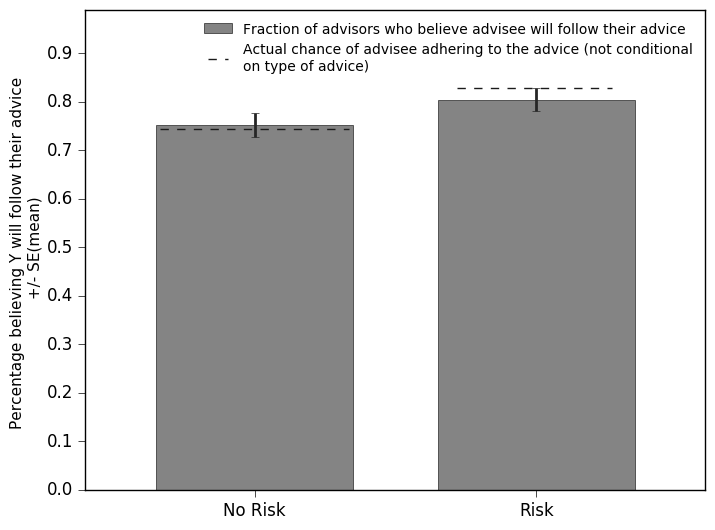

In [9]:
follow_df = df[(df.Advise==1)].groupby('Treatment_first')['Follow'].mean()
hline_label = 'Actual chance of advisee adhering to the advice (not conditional\non type of advice)'
bar_label = 'Fraction of advisors who believe advisee will follow their advice'  
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor='w')
beliefs['Belief1']['mean'].plot(yerr=beliefs['Belief1']['sem'], error_kw=e_kw, ax=ax, label=bar_label, **bar_kw)
ax.tick_params(axis='x', rotation=0, **tick_kw)
ax.tick_params(axis='y', **tick_kw)
ax.set_ylabel("Percentage believing Y will follow their advice \n +/- SE(mean)", **ylabel_kw)
ax.set_xlabel("")
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_ylim(top=0.99)
ax.axhline(y=follow_df['No Risk'], xmin=.12, xmax=0.425, c='0.1', lw=1, ls='--', label=hline_label)
ax.axhline(y=follow_df['Risk'], xmin=.6, xmax=0.85, c='0.1', lw=1, ls='--')
legend_handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(legend_handles[::-1], legend_labels[::-1], shadow=False, frameon=False, framealpha=0.1, fontsize=10)     
plt.savefig(os.path.join(FIGURES_FOLDER, 'beliefs1.pdf'), bbox_inches='tight')
plt.show()